# Topic 6 DQ 2

Consider a real-world scenario where you need to conduct a statistical test for paired data, multiple population means, or variance comparisons. Describe the problem, the data, and the research question. Discuss the appropriate statistical test that you would use to address the research question and explain why. Perform the test. Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations. How can you use the results to inform decisions or actions in the real-world scenario?

Prepare your answer as follows:

   - Provide a professionally written answer, anchored in scholarly work.
   - Create a diagram, table, or other visual prop to help explain your answer and include 1–2 sentences describing the visual.
   - include a Jupyter notebook with the relevant Python code you created.
   - Record a short 2- to 3-minute video (using tools like Zoom or Loom) in which you explain your answer and code. Use an online video platform such as Loom, YouTube, or Vimeo to upload your completed video. Include the link to the video in your answer.

- Problem description:

Suppose we are studying the effect of Obama Care on health insurance coverage. We wish to determine whether there is a significant difference between the percentage of uninsured before and the percentage of uninsured after Obama Care went into effect.

- Data :

The Affordable Care Act (ACA) is the name for the comprehensive health care reform law and its amendments which addresses health insurance coverage, health care costs, and preventive care. The law was enacted in two parts: The Patient Protection and Affordable Care Act was signed into law on March 23, 2010 by President Barack Obama and was amended by the Health Care and Education Reconciliation Act on March 30, 2010.

- Appropriate statistical test:

To answer this question, a paired t-test should be performed. This test compares the percentage of uninsured in 2010 and 2015 to determine whether there is a statistically significant difference between the two. 

- Python tool:

To perform the paired t-test and interpret the results, we can use the Python library scipy.stats. In addition, we can use matplotlib for visualizations, such as boxplots or histograms, to compare the distribution.



In [16]:
# Import necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd


In [26]:
#read the dataset
df = pd.read_csv("states.csv")
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

### we will clean the data

In [19]:
#remove units of measurement
df["Uninsured Rate (2010)"] = df["Uninsured Rate (2010)"].str.split(pat = "%").str[0]

In [20]:
#remove units of measurement
df["Uninsured Rate (2015)"] = df["Uninsured Rate (2015)"].str.split(pat = "%").str[0]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [22]:
#change data types

df["Uninsured Rate (2010)"] = df["Uninsured Rate (2010)"].astype('float')

df["Uninsured Rate (2015)"] = df["Uninsured Rate (2015)"].astype('float')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     float64
 2   Uninsured Rate (2015)                         52 non-null     float64
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

### Perform paired t-test

Paired t-test Results:
T-Statistic: 18.575415987078056
P-Value: 2.372908655681907e-24
there is a significant difference between the percentage of uninsured people before and after the implementation of obama care.


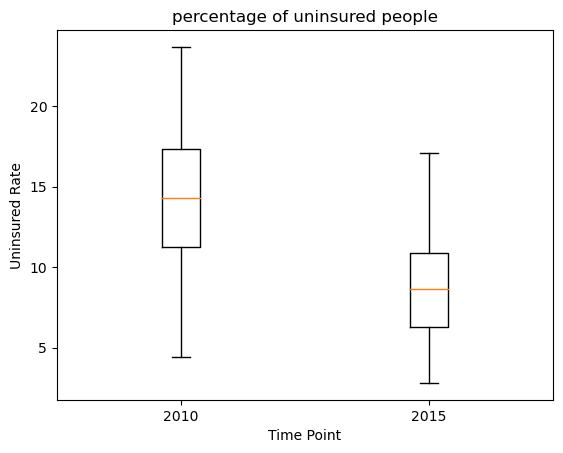

In [25]:
before_measurements = df["Uninsured Rate (2010)"]
after_measurements = df["Uninsured Rate (2015)"]

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(before_measurements, after_measurements)

# Print results
print("Paired t-test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret results
if p_value < 0.05:
    print("there is a significant difference between the percentage of uninsured people before and after the implementation of obama care.")
else:
    print("there is no  significant difference between the percentage of uninsured people before and after the implementation of obama care..")

# Visualize data
plt.boxplot([before_measurements, after_measurements], labels=['2010', '2015'])
plt.xlabel('Time Point')
plt.ylabel('Uninsured Rate')
plt.title('percentage of uninsured people')
plt.show()